In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import VotingClassifier
from sklearn.externals import joblib
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [2]:
df = pd.read_csv("new_with_date.csv")

In [6]:
import matplotlib
matplotlib.style.use('ggplot')

In [7]:
df.head()


,aaDate,MUNICIPALITY,YEAR_CONTRACT,MONTH_CONTRACT,DAY_ALTA_CONTR,CENSUS SECTION,WATER_USAGE,TYPE_OF_HOUSEHOLD,NUMBER_OF_CONTRACTS
0,2016-01-01,BADALONA,2016,jan.,1,801509017,HOUSEHOLD,D,1
1,2016-01-01,GAVA,2016,jan.,1,808901007,HOUSEHOLD,W,1
2,2016-01-01,STA.COLOMA GRAMENET,2016,jan.,1,824504004,HOUSEHOLD,B,1
3,2016-01-01,STA.COLOMA GRAMENET,2016,jan.,1,824502002,HOUSEHOLD,B,1
4,2016-01-02,L'HOSPITALET LLOBR.,2016,jan.,2,810103006,HOUSEHOLD,C,1


In [10]:
new_df = df[['aaDate','NUMBER_OF_CONTRACTS']]

In [21]:
sum_df = new_df.groupby(['aaDate'],as_index=False).sum()

In [26]:
sum_df2 = pd.DataFrame(data=sum_df)

In [31]:
sum_df2.describe()

,NUMBER_OF_CONTRACTS
count,3904.000000
mean,80.379611
std,52.590854
min,1.000000
25%,18.000000
50%,95.000000
75%,120.000000
max,330.000000


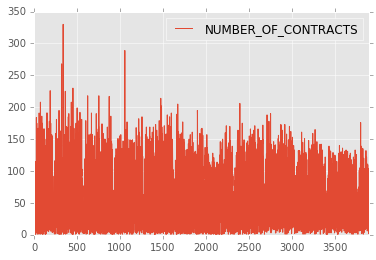

In [34]:
sum_df2.plot()
plt.show()

In [37]:
df_old = pd.read_csv("end_with_date.csv")


In [38]:
df_old.head()

,aaDate,MUNICIPALITY,YEAR_END_CONTRACT,MONTH_END_CONTRACT,DAY_END_CONTRACT,CENSUS_SECTION,WATER_USAGE,TYPE_OF_HOUSEHOLD,NUMBER_OF_CONTRACTS_ENDED
0,2016-08-01,BARCELONA,2016,aug.,1.0,801902193.0,HOUSEHOLD,B,1.0
1,2016-08-01,BARCELONA,2016,aug.,1.0,801902193.0,HOUSEHOLD,C,1.0
2,2016-08-01,BARCELONA,2016,aug.,1.0,801903159.0,HOUSEHOLD,A,1.0
3,2016-08-01,BARCELONA,2016,aug.,1.0,801909116.0,HOUSEHOLD,B,1.0
4,2016-08-01,BARCELONA,2016,aug.,1.0,801909103.0,HOUSEHOLD,C,1.0


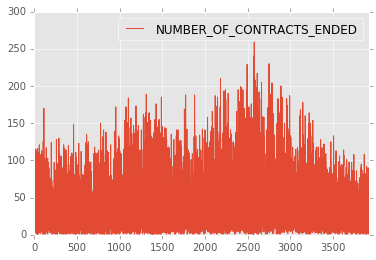

In [39]:
old_df = df_old[['aaDate','NUMBER_OF_CONTRACTS_ENDED']]
old_sum_df = old_df.groupby(['aaDate'],as_index=False).sum()
sum_df_old = pd.DataFrame(data=old_sum_df)
sum_df_old.plot()
plt.show()

In [40]:
Net_change = -(sum_df_old.NUMBER_OF_CONTRACTS_ENDED - sum_df2.NUMBER_OF_CONTRACTS)

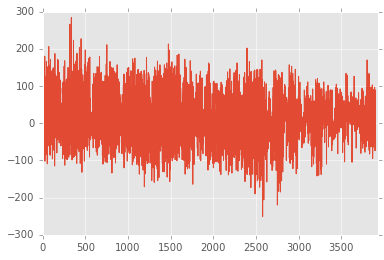

In [41]:
Net_change.plot()
plt.show()

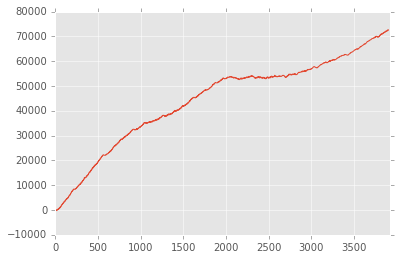

In [43]:
Nccsum = Net_change.cumsum()
Nccsum.plot()
plt.show()

In [44]:
sum_df_old.head()

,aaDate,NUMBER_OF_CONTRACTS_ENDED
0,2006-01-02,104.0
1,2006-01-03,72.0
2,2006-01-04,85.0
3,2006-01-05,44.0
4,2006-01-06,3.0


In [45]:
sum_df2.head()

,aaDate,NUMBER_OF_CONTRACTS
0,2005-11-25,1
1,2006-01-02,15
2,2006-01-03,83
3,2006-01-04,88
4,2006-01-05,104


In [48]:
sum_df2 = sum_df2.sort_values(by='aaDate', axis=0)

In [50]:
sum_df_old = sum_df_old.sort_values(by='aaDate', axis=0)

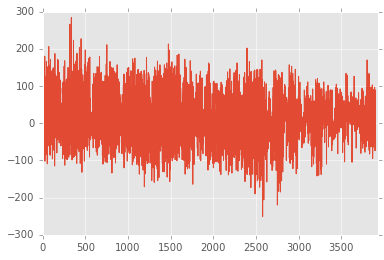

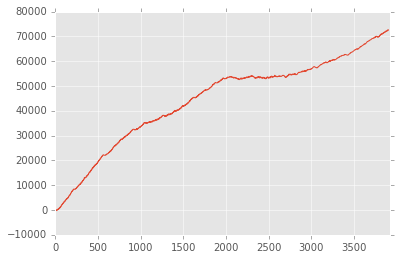

In [52]:
Net_change = -(sum_df_old.NUMBER_OF_CONTRACTS_ENDED - sum_df2.NUMBER_OF_CONTRACTS)
Net_change.plot()
plt.show()
Nccsum = Net_change.cumsum()
Nccsum.plot()
plt.show()

In [53]:
sum_df2.to_csv("New_Grouped_by_date")
sum_df_old.to_csv("Old_Grouped_by_date")

In [54]:
df_t = pd.read_csv("Contacts_Pre_2017.csv")

In [55]:
df_t.head()

,START.DATE,END.DATE,CONTACT.TYPE,Contacts
0,2010-01-01,2010-01-01,Call - Input,84
1,2010-01-01,2010-01-01,Web - Input,11
2,2010-01-02,2010-01-02,Call - Input,236
3,2010-01-02,2010-01-02,Web - Input,21
4,2010-01-02,2010-01-03,Call - Input,1


In [61]:
df_n = pd.get_dummies(df_t,columns=['CONTACT.TYPE'])

In [62]:
df_n.head()

,START.DATE,END.DATE,Contacts,CONTACT.TYPE_Call - Input,CONTACT.TYPE_Fax - Input,CONTACT.TYPE_Fax Acknowledgement - Input,CONTACT.TYPE_Installation Report - Input,CONTACT.TYPE_Internal Management,CONTACT.TYPE_Mail - Input,CONTACT.TYPE_Mail - Recieved,CONTACT.TYPE_Tweet - Input,CONTACT.TYPE_Visit,CONTACT.TYPE_Web - Input
0,2010-01-01,2010-01-01,84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2010-01-01,2010-01-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2010-01-02,2010-01-02,236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2010-01-02,2010-01-02,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2010-01-02,2010-01-03,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
df_new = df_n.merge(sum_df2, left_on='START.DATE', right_on='aaDate', how='inner')

In [67]:
df_new = df_new.merge(sum_df_old,left_on='START.DATE', right_on='aaDate', how='inner')

In [68]:
df_new.head()

,START.DATE,END.DATE,Contacts,CONTACT.TYPE_Call - Input,CONTACT.TYPE_Fax - Input,CONTACT.TYPE_Fax Acknowledgement - Input,CONTACT.TYPE_Installation Report - Input,CONTACT.TYPE_Internal Management,CONTACT.TYPE_Mail - Input,CONTACT.TYPE_Mail - Recieved,CONTACT.TYPE_Tweet - Input,CONTACT.TYPE_Visit,CONTACT.TYPE_Web - Input,aaDate_x,NUMBER_OF_CONTRACTS,aaDate_y,NUMBER_OF_CONTRACTS_ENDED
0,2010-01-01,2010-01-01,84,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-01,1,2010-01-01,1.0
1,2010-01-01,2010-01-01,11,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-01-01,1,2010-01-01,1.0
2,2010-01-02,2010-01-02,236,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-02,5,2010-01-02,2.0
3,2010-01-02,2010-01-02,21,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-01-02,5,2010-01-02,2.0
4,2010-01-02,2010-01-03,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2010-01-02,5,2010-01-02,2.0


In [69]:
labels = ['START.DATE','NUMBER_OF_CONTRACTS','NUMBER_OF_CONTRACTS_ENDED','Contacts']
df_new[labels].head()

,START.DATE,NUMBER_OF_CONTRACTS,NUMBER_OF_CONTRACTS_ENDED,Contacts
0,2010-01-01,1,1.0,84
1,2010-01-01,1,1.0,11
2,2010-01-02,5,2.0,236
3,2010-01-02,5,2.0,21
4,2010-01-02,5,2.0,1


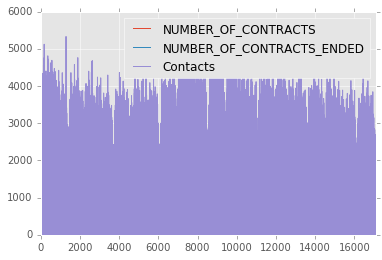

In [70]:
df_new[labels].plot()
plt.show()

In [71]:
sum_df_n = df_n.groupby(['START.DATE'],as_index=False).sum()
sum_df_nee = pd.DataFrame(data=sum_df_n)

In [73]:
sum_df_nee = sum_df_nee.sort_values(by='START.DATE', axis=0)

In [74]:
sum_df_nee.head()

,START.DATE,Contacts,CONTACT.TYPE_Call - Input,CONTACT.TYPE_Fax - Input,CONTACT.TYPE_Fax Acknowledgement - Input,CONTACT.TYPE_Installation Report - Input,CONTACT.TYPE_Internal Management,CONTACT.TYPE_Mail - Input,CONTACT.TYPE_Mail - Recieved,CONTACT.TYPE_Tweet - Input,CONTACT.TYPE_Visit,CONTACT.TYPE_Web - Input
0,2010-01-01,95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,2010-01-02,258,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2010-01-03,193,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2010-01-04,4378,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0
4,2010-01-05,3452,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0


In [75]:
df_new_n = sum_df_nee.merge(sum_df2, left_on='START.DATE', right_on='aaDate', how='inner')
df_new_n = df_new_n.merge(sum_df_old,left_on='START.DATE', right_on='aaDate', how='inner')

In [76]:
df_new_n.head()

,START.DATE,Contacts,CONTACT.TYPE_Call - Input,CONTACT.TYPE_Fax - Input,CONTACT.TYPE_Fax Acknowledgement - Input,CONTACT.TYPE_Installation Report - Input,CONTACT.TYPE_Internal Management,CONTACT.TYPE_Mail - Input,CONTACT.TYPE_Mail - Recieved,CONTACT.TYPE_Tweet - Input,CONTACT.TYPE_Visit,CONTACT.TYPE_Web - Input,aaDate_x,NUMBER_OF_CONTRACTS,aaDate_y,NUMBER_OF_CONTRACTS_ENDED
0,2010-01-01,95,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-01-01,1,2010-01-01,1.0
1,2010-01-02,258,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2010-01-02,5,2010-01-02,2.0
2,2010-01-04,4378,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2010-01-04,57,2010-01-04,137.0
3,2010-01-05,3452,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2010-01-05,70,2010-01-05,52.0
4,2010-01-07,3914,2.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,2010-01-07,102,2010-01-07,112.0


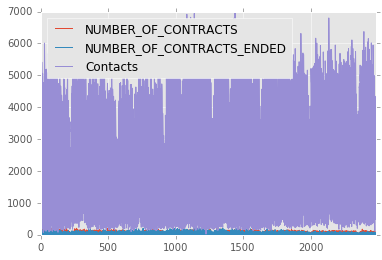

In [77]:
labels = ['START.DATE','NUMBER_OF_CONTRACTS','NUMBER_OF_CONTRACTS_ENDED','Contacts']
df_new_n[labels].head()
df_new_n[labels].plot()
plt.show()

In [78]:
df_att = df_new_n[labels];

ss = StandardScaler()

ss.fit(df_att)

AttributeError: 'StandardScaler' object has no attribute 'fit_tranform'

In [86]:
df_att = df_new_n[labels];
df_att.head()

,START.DATE,NUMBER_OF_CONTRACTS,NUMBER_OF_CONTRACTS_ENDED,Contacts
0,2010-01-01,1,1.0,95
1,2010-01-02,5,2.0,258
2,2010-01-04,57,137.0,4378
3,2010-01-05,70,52.0,3452
4,2010-01-07,102,112.0,3914


In [88]:
df_k = df_att.drop(df_att[['START.DATE']],axis=1)

In [89]:
ss = StandardScaler()

ss.fit(df_k)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [95]:
from sklearn.preprocessing import scale

dk = scale(df_k)

In [101]:
#dk
ss =  df_att[['START.DATE']]
dfin = {"Scaled_data": dk}

print dfin

{'Scaled_data': array([[-1.55627092, -1.33022931, -1.55296462],
       [-1.47611145, -1.30973859, -1.4742421 ],
       [-0.43403834,  1.45650896,  0.515554  ],
       ..., 
       [ 0.22727729,  0.12461199,  0.46532614],
       [ 0.30743676, -0.36716535,  0.23398819],
       [-1.51619119, -1.20728498, -1.36074645]])}


In [113]:
y = df_att.NUMBER_OF_CONTRACTS.values
X = dk[:,0:2]


In [114]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42 )

In [116]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()

RF.fit(X_train,y_train)
pred_rf = RF.predict(X_test)
pred_rf_proba = RF.predict_proba(X_test)

score_rf = RF.score(X_test,y_test)
print score_rf

print(confusion_matrix(y_test,pred_rf))
#print(classification_report(y_test,pred_rf))
#print log_loss(y_test,pred_rf_proba)

joblib.dump(RF, 'RF2.pkl')

0.639839034205
[[10  0  0 ...,  0  0  0]
 [ 0 10  0 ...,  0  0  0]
 [ 0  0  7 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]]


['RF2.pkl']

In [117]:
#steps_GBC = [('ss',StandardScaler()),('pca', PCA()),('GradientBoosterClassifier', GradientBoostingClassifier())]
GBC = GradientBoostingClassifier()
#GBC = Pipeline(steps_GBC)
GBC.fit(X_train,y_train)
pred_gbc = GBC.predict(X_test)
pred_gbc_proba = GBC.predict_proba(X_test)

score_gbc = GBC.score(X_test,y_test)
print score_gbc

print(confusion_matrix(y_test,pred_gbc))
print(classification_report(y_test,pred_gbc))
#print log_loss(y_test,pred_gbc_proba)

joblib.dump(GBC, 'GBC2.pkl')

0.985915492958
[[10  0  0 ...,  0  0  0]
 [ 0 10  0 ...,  0  0  0]
 [ 0  0  7 ...,  0  0  0]
 ..., 
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  0  0]
 [ 0  0  0 ...,  0  1  0]]
             precision    recall  f1-score   support

          1       1.00      1.00      1.00        10
          2       1.00      1.00      1.00        10
          3       1.00      1.00      1.00         7
          4       1.00      1.00      1.00        10
          5       1.00      1.00      1.00         7
          6       1.00      1.00      1.00         5
          7       1.00      1.00      1.00        12
          8       1.00      1.00      1.00         5
          9       1.00      1.00      1.00         5
         10       1.00      1.00      1.00         3
         11       1.00      1.00      1.00         7
         12       1.00      1.00      1.00         8
         13       1.00      1.00      1.00         7
         14       1.00      1.00      1.00         1
         15       1.00   

C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1115: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


['GBC2.pkl']

In [119]:
from sklearn.metrics import mean_squared_error
print mean_squared_error(y_test, pred_gbc)

16.0824949698


In [120]:
df_att.tail()

,START.DATE,NUMBER_OF_CONTRACTS,NUMBER_OF_CONTRACTS_ENDED,Contacts
2477,2016-12-27,64,68.0,4300
2478,2016-12-28,89,47.0,4343
2479,2016-12-29,90,72.0,4274
2480,2016-12-30,94,48.0,3795
2481,2016-12-31,3,7.0,493


In [126]:
labels2 = ['START.DATE','aaDate_x','aaDate_y','NUMBER_OF_CONTRACTS'] 
dfff= df_new_n.drop(labels2,axis=1)

#df_k2 = dfff.drop(df_att[['START.DATE']],axis=1)
dk2 = scale(dfff)
ss2 =  df_new_n[['START.DATE']]
dfin2 = {"Scaled_data": dk2}
y2 = df_new_n.NUMBER_OF_CONTRACTS.values


In [127]:
print dk2

[[-1.55296462 -0.51482094 -1.67883124 ..., -1.53577104 -0.03796057
  -1.33022931]
 [-1.4742421   1.93304414 -1.67883124 ..., -1.53577104 -0.03796057
  -1.30973859]
 [ 0.515554   -0.51482094  0.59317483 ...,  0.65113873 -0.03796057
   1.45650896]
 ..., 
 [ 0.46532614 -0.51482094  0.59317483 ...,  0.65113873 -0.03796057
   0.12461199]
 [ 0.23398819 -0.51482094  0.59317483 ...,  0.65113873 -0.03796057
  -0.36716535]
 [-1.36074645 -0.51482094 -1.67883124 ..., -1.53577104 -0.03796057
  -1.20728498]]


In [128]:
X2 = dk2
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2,random_state=42 )

In [129]:
#steps_GBC = [('ss',StandardScaler()),('pca', PCA()),('GradientBoosterClassifier', GradientBoostingClassifier())]
GBC2 = GradientBoostingClassifier()
#GBC = Pipeline(steps_GBC)
GBC2.fit(X2_train,y2_train)
pred_gbc2 = GBC2.predict(X2_test)
pred_gbc_proba2 = GBC2.predict_proba(X2_test)

score_gbc2 = GBC2.score(X2_test,y2_test)
print score_gbc2

#print(confusion_matrix(y2_test,pred_gbc2))
#print(classification_report(y2_test,pred_gbc2))
#print log_loss(y_test,pred_gbc_proba)

joblib.dump(GBC, 'GBC3.pkl')

0.0181086519115


['GBC3.pkl']

In [131]:
score_gbc3 = GBC.score(X_test,y_test)
print score_gbc3

0.985915492958
